## EDA

---

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
pd.options.display.max_colwidth = 400

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [553]:
hp = pd.read_csv('../datasets/h_potter.csv')
marvel = pd.read_csv('../datasets/marvel.csv')

In [554]:
hp['created_utc'].sort_values()

14998    1641720375
14997    1641720871
14996    1641720930
14995    1641721124
14994    1641722016
            ...    
4        1650943698
3        1650944151
2        1650944237
1        1650944593
0        1650944754
Name: created_utc, Length: 14999, dtype: int64

The data for r/harrypotter ranges from Sunday, January 9, 2022 to Monday, April 25, 2022.

In [555]:
marvel['created_utc'].sort_values()

14997    1640059236
14996    1640059279
14995    1640059409
14994    1640059528
14993    1640059646
            ...    
4        1650943367
3        1650943893
2        1650943914
1        1650944330
0        1650944643
Name: created_utc, Length: 14998, dtype: int64

The data for r/Marvel ranges from  Monday, December 20, 2021 to Monday, April 25, 2022.

In [556]:
subreddit = pd.read_csv('../datasets/subreddit_combined.csv')
subreddit.head()

,link_flair_text,over_18,selftext,subreddit,title
0,Other,False,So in the venom 2 post credit venom says he recognizes peter Parker even though that venom has never met him because almost the moment venom arrived on earth he has been with Eddie or in a secret facility so could they have met in between movies?,Marvel,plot hole
1,Film/Television,False,"Alright, so I avoided this movie until today, what’s that like 12 years, because if the reviews and I gotta say, it was actually pretty good. Way better than the second Venom, let there be Carnage. \n\nForget other peoples opinions. Watch what you want.",Marvel,"Green lantern, not that bad."
2,Comics,False,"So put together a Team using only D-Listers, let's see what you guys can come up with!\n\nFor me:\n\nBlack Goliath (Bill Foster)\nPatriot (Jeffrey Mace)\nQuake (Daisy Johnson)\nJennifer Kale (the Sorceress from Man-Thing, Dr Strange and Ghost Rider)\nX-51/Machine Man (Aaron Stack)",Marvel,Create a Team using D-List Heroes!
3,Comics,False,"In the comics, Nate Grey has gone out of the way to do what he thinks is best for the world, no matter the cost, and he certainly has the power to do so. It would be interesting to see a storyline where they essentially give him the mindset of Dr. Doom and have him take over the world. Basically the God-Emperor Doom story but with Nate Grey instead.\n\nHowever, where this story diverges is tha...",Marvel,Interesting idea for Nate Grey storyline
4,Film/Television,False,"After watching shows that depicted the realistic consequences of superhumans like The Boys and Invincible there were moments from shows like Ultimate Spiderman and Avengers Assemble that made me genuinely think about how dangerous the character's actions were. Notably in the episode where Spiderman captures Dr. Doom and brings him to the helicarrier, he breaks out and goes on a rampage but the...",Marvel,If Marvel shows were more mature the consequences of character's actions and themes would be a lot more intense.


In [557]:
subreddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   link_flair_text  9600 non-null   object
 1   over_18          9600 non-null   bool  
 2   selftext         9600 non-null   object
 3   subreddit        9600 non-null   object
 4   title            9600 non-null   object
dtypes: bool(1), object(4)
memory usage: 309.5+ KB


In [558]:
subreddit.describe()

,link_flair_text,over_18,selftext,subreddit,title
count,9600,9600,9600,9600,9600
unique,30,2,9571,2,9487
top,Discussion,False,"I love Japanese culture and there is a lot you can take from Japanese mythology, such as various creatures and demons, as well as characters from folklore. We've had Norse mythology, and Greek mythology, now it's time Japanese mythology gets some focus. I personally think Amaterasu is the perfect character to help bring readers into this world in the same way Thor introduced Norse mythology, a...",harrypotter,Question
freq,3082,9553,3,6109,18


#### The amount of rows for each subreddit is below:

In [581]:
subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

In [450]:
over_18 = pd.DataFrame(subreddit[subreddit['over_18'] == True]['subreddit'])
over_18.value_counts()

subreddit  
harrypotter    37
Marvel         10
dtype: int64

##### It appears that of the data that I gathered, the majority of posters are under 18.

In [463]:
under_18 = pd.DataFrame(subreddit[subreddit['over_18'] == False]['subreddit'])
under_18.value_counts()

subreddit  
harrypotter    6072
Marvel         3481
dtype: int64

In [473]:
subreddit['link_flair_text'].value_counts()[:10]

Discussion           3082
Comics               1356
Question             1350
Film/Television      1264
Other                 692
Help                  276
Fantastic Beasts      260
Misc                  236
Currently Reading     187
Dungbomb              145
Name: link_flair_text, dtype: int64

In [474]:
flair_text = subreddit[['link_flair_text', 'subreddit']]
flair_text.head()

,link_flair_text,subreddit
0,Other,Marvel
1,Film/Television,Marvel
2,Comics,Marvel
3,Comics,Marvel
4,Film/Television,Marvel


In [573]:
subreddit.head(2)

,link_flair_text,over_18,selftext,subreddit,title
0,Other,False,So in the venom 2 post credit venom says he recognizes peter Parker even though that venom has never met him because almost the moment venom arrived on earth he has been with Eddie or in a secret facility so could they have met in between movies?,Marvel,plot hole
1,Film/Television,False,"Alright, so I avoided this movie until today, what’s that like 12 years, because if the reviews and I gotta say, it was actually pretty good. Way better than the second Venom, let there be Carnage. \n\nForget other peoples opinions. Watch what you want.",Marvel,"Green lantern, not that bad."


#### Below I'm looking to see what category from link_flair_text each subreddit post is under.

In [578]:
subreddit[subreddit['subreddit'] == 'Marvel'][['link_flair_text']].value_counts()

link_flair_text
Comics             1356
Film/Television    1264
Other               692
Fan Made             54
Games                49
Artwork              28
Merchandise          20
Mod                  14
Webcomics            10
Comics                3
Cosplay               1
dtype: int64

In [579]:
subreddit[subreddit['subreddit'] == 'harrypotter'][['link_flair_text']].value_counts()

link_flair_text      
Discussion               3082
Question                 1350
Help                      276
Fantastic Beasts          260
Misc                      236
Currently Reading         187
Dungbomb                  145
Fanworks                  122
Cursed Child               86
Hogwarts Legacy/Games      69
Announcement               64
Original Content           54
Merchandise                51
Points!                    29
Video                      23
Tattoo                     20
News                       19
Event                      16
Behind the Scenes          13
Parks Visit                 7
dtype: int64

#### Getting the Most Common Words in 'selftext' Per Subreddit

In [331]:
cv1 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv1.fit(subreddit['selftext'])
vect_status = cv1.transform(subreddit['selftext'])
status_df = pd.DataFrame(vect_status.A, columns=cv1.get_feature_names_out())

common_words = status_df.sum().sort_values(ascending=False).head(15)
common_words

harry         5786
like          5086
just          4953
know          3042
think         2996
time          2155
man           2095
really        2027
people        1914
snape         1906
marvel        1826
dumbledore    1803
did           1748
voldemort     1738
amp           1726
dtype: int64

#### Getting common bigrams in 'selftext'

In [332]:
cv2 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2, ngram_range=(2,2))
cv2.fit(subreddit['selftext'])
vect_status = cv2.transform(subreddit['selftext'])
bigram_df = pd.DataFrame(vect_status.A, columns=cv2.get_feature_names_out())

common_bigrams = bigram_df.sum().sort_values(ascending=False).head(15)
common_bigrams

spider man          1296
harry potter        1265
amp x200b            516
https www            421
feel like            368
wizarding world      353
moon knight          325
death eaters         295
iron man             274
https redd           259
deathly hallows      257
amazing spider       248
don know             244
read books           241
fantastic beasts     226
dtype: int64

In [333]:
status_df['subreddit'].value_counts()

0    9547
1      50
2       3
Name: subreddit, dtype: int64

##### Not sure what this column is, so going to drop it

In [334]:
status_df.shape

(9600, 15389)

In [335]:
bigram_df.shape

(9600, 45697)

In [336]:
status_df.drop(columns='subreddit', inplace=True)

In [337]:
status_df.columns

Index(['00', '000', '001', '003', '00s', '01', '02', '03', '04', '05',
       ...
       'zodiac', 'zombie', 'zombies', 'zone', 'zoo', 'zoologist', 'zoom',
       'zoomed', 'zooming', 'zouwu'],
      dtype='object', length=15388)

In [338]:
status_df.shape

(9600, 15388)

In [339]:
subreddit['subreddit']

0            Marvel
1            Marvel
2            Marvel
3            Marvel
4            Marvel
           ...     
9595    harrypotter
9596    harrypotter
9597    harrypotter
9598    harrypotter
9599    harrypotter
Name: subreddit, Length: 9600, dtype: object

In [340]:
subreddit.columns

Index(['link_flair_text', 'over_18', 'selftext', 'subreddit', 'title'], dtype='object')

In [341]:
status_df

,00,000,001,003,00s,01,02,03,04,05,...,zodiac,zombie,zombies,zone,zoo,zoologist,zoom,zoomed,zooming,zouwu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
subreddit.reset_index(inplace=True)

In [343]:
selftext_common_words_subreddit = pd.concat([status_df, subreddit['subreddit']], axis=1)
selftext_common_words_subreddit.head()

,00,000,001,003,00s,01,02,03,04,05,...,zombie,zombies,zone,zoo,zoologist,zoom,zoomed,zooming,zouwu,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel


In [344]:
selftext_common_bigrams_subreddit = pd.concat([bigram_df, subreddit['subreddit']], axis=1)
selftext_common_bigrams_subreddit.head()

,00 pm,000 000,000 605,01 04,01 05,01 12,02 03,02 07,02 09,03 14,...,zero sense,zipped way,zodiac 10,zombie episode,zombie sentry,zombies comics,zombies season,zone fit,zoomed away,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel


In [345]:
selftext_common_words_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

In [346]:
selftext_common_bigrams_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

##### Filtering the words by subreddit

In [347]:
hp_common = selftext_common_words_subreddit[selftext_common_words_subreddit['subreddit']=='harrypotter']

In [348]:
hp_common_bigrams = selftext_common_bigrams_subreddit[selftext_common_bigrams_subreddit['subreddit']=='harrypotter']

In [349]:
marvel_common = selftext_common_words_subreddit[selftext_common_words_subreddit['subreddit']=='Marvel']

In [350]:
marvel_common_bigrams = selftext_common_bigrams_subreddit[selftext_common_bigrams_subreddit['subreddit']=='Marvel']

In [351]:
hp_common.drop(columns=['subreddit'], inplace=True)

In [352]:
hp_common_bigrams.drop(columns=['subreddit'], inplace=True)

In [353]:
hp_common_words = hp_common.sum().sort_values()
hp_common_words

layla                0
fin                  0
conan                0
powerfull            0
unconventional       0
                  ... 
know              2087
think             2126
just              3334
like              3370
harry             5750
Length: 15388, dtype: int64

In [354]:
hp_common_bigrams_list = hp_common_bigrams.sum().sort_values()
hp_common_bigrams_list

love god              0
movie logic           0
strong men            0
movie looked          0
movie looking         0
                   ... 
feel like           268
death eaters        295
wizarding world     353
amp x200b           369
harry potter       1263
Length: 45697, dtype: int64

##### 'gt gt' being a common bigram, as seen below, doesn't mean an actual word. It appears to be code for the 'greater than' sign.

##### The amp x200b is also a zero-width space character, so we can ignore it.

In [355]:
subreddit[subreddit['selftext'].str.contains('gt')].tail(10)

,index,link_flair_text,over_18,selftext,subreddit,title
9164,9164,Discussion,False,"Also, Mcgonagall was having a blast with this, she loved dueling and taking down death eaters. and Im sure if there was one of those metal chairs that fold, she would of used it as well\n\n1. Molly has a bodycount more then Bellatrix just the others weren't important enough to show \n\n2. I think the death of Fred hit Professor Mcgonagall extra hard. Imagine her just sending him and George to...",harrypotter,What are some of your headcanons for the Battle of Hogwarts?
9210,9210,Discussion,False,"1. Prisoner of Azkaban- I love so much from this book. The dementors are a really creative, interesting addition. The Marauders story of loyalty and betrayal. Learning more about the world like the Whomping Willow and the Shrieking Shack. Sirius and Lupin are great additions. The Hogsmead plot wrapping up in the best way possible. Expecto Patronum. The length was just right, Quidditch plot pro...",harrypotter,Yet another HP ranking (books)
9227,9227,Points!,False,#Results for Round 1 of January \n&gt;GAME A: Gryffindor vs Slytherin &amp; GAME B: Hufflepuff vs Ravenclaw \n##4 Releasers posted 19 Balls this round [ 14 Quaffle(s) 2 Bludger(s) 3 Snitch(es) ] \n \n \n * /u/calculost: 1 Balls [1 Quaffle(s) 0 Bludger(s) 0 Snitch(es)] \n * /u/Im_Finally_Free: 9 Balls [6 Quaffle(s) 1 Bludger(s) 2 Snitch(es)] \n * /u/clariannagrindelwald: 7 Balls [5 Qu...,harrypotter,"Quidditch Results - Round 1: January 03-10, 2022"
9240,9240,Discussion,False,"I understand that although trying to place my self in ONE hog wart house is a very illogical thing to do since humans are multifaceted, so take this as just for fun. I've came closer to my individual truth than before and I think I might be a step closer to discovering myself. \n\nI was thinking about my Hogwarts house values and realised although I do, don't care about what Hogwarts houses ...",harrypotter,House Initiation
9279,9279,Discussion,False,"OoP, *Dumbledore's got style* scene:\n\n&gt;Professor Umbridge seized Marietta, pulled her around to face her, and began shaking her very hard. A split second later Dumbledore was on his feet, his wand raised. Kingsley started forward and Umbridge leapt back from Marietta, waving her hands in the air as though they had been burned. \n&gt; \n&gt;**“I cannot allow you to manhandle my students,...",harrypotter,Dumbledore's Hypocrisy
9280,9280,Misc,False,Ayyy just joined the harry potter fan club thing and took the test. I got hufflepuff. GO HUFFLEPUFF. :&gt;,harrypotter,Haha I always thought I might be in this house.
9375,9375,Discussion,False,"The First Wizarding War lasted from 1970 to 1981 and with more casualties. When Voldemort was defeated in this war, the Order of the Phoenix was already the brink of collapse with Order members dying and mysteriously disappearing, the Ministry of Magic was in a complete mess and disarray, and Voldemort and his followers had been on the greatest peak of their power since at least 1978 . Sirius ...",harrypotter,Which war was devastating?
9397,9397,Currently Reading,False,"Of all the comfort media I've consumed in the past few months, HP is the one I just can't seem to get over after the usual amount of time (and it's not even because of nostalgia because I didn't get to ready the books growing up), and the sixth book I keep returning to every few days, at least to skim the whole story or to read favourtie parts. \n\nOne of my favourite things about it has to be...",harrypotter,"At the same time being a ridiculously good build-up to the finale, The Half-Blood Prince is such an amazing book all on its own."
9442,9442,Discussion,False,"Listening to the audiobooks the first time, I hear this:\n\n&gt;Dudley's gang had been chasing him as usual, when, as much to Harry's surprise as anyone else's, there he was, sitting on the chimney\n\nI know uncontrolled magic can cause strange things to happen, but surely Harry couldn't Apparate on to the roof 

In [356]:
hp_common_words_df = pd.DataFrame(hp_common_words, columns=['word_count'])
hp_common_words_df = hp_common_words_df[hp_common_words_df['word_count'] > 0].tail(10)
hp_common_words_df

,word_count
books,1581
potter,1624
voldemort,1738
dumbledore,1803
snape,1906
know,2087
think,2126
just,3334
like,3370
harry,5750


In [357]:
hp_common_bigrams_df = pd.DataFrame(hp_common_bigrams_list, columns=['word_count'])
hp_common_bigrams_df = hp_common_bigrams_df[hp_common_bigrams_df['word_count'] > 0].tail(10)
hp_common_bigrams_df

,word_count
gt gt,212
fantastic beasts,226
read books,236
https www,244
deathly hallows,257
feel like,268
death eaters,295
wizarding world,353
amp x200b,369
harry potter,1263


##### Adding a Percent column to better compare the r/Marvel and r/harrypotter words

In [358]:
hp_common_words_df['percent'] = ((hp_common_words_df['word_count'] / 13942) * 100).round(2)
hp_common_words_df

,word_count,percent
books,1581,11.34
potter,1624,11.65
voldemort,1738,12.47
dumbledore,1803,12.93
snape,1906,13.67
know,2087,14.97
think,2126,15.25
just,3334,23.91
like,3370,24.17
harry,5750,41.24


In [359]:
hp_common_bigrams_df['percent'] = ((hp_common_bigrams_df['word_count'] / 37307) * 100).round(2)
hp_common_bigrams_df

,word_count,percent
gt gt,212,0.57
fantastic beasts,226,0.61
read books,236,0.63
https www,244,0.65
deathly hallows,257,0.69
feel like,268,0.72
death eaters,295,0.79
wizarding world,353,0.95
amp x200b,369,0.99
harry potter,1263,3.39


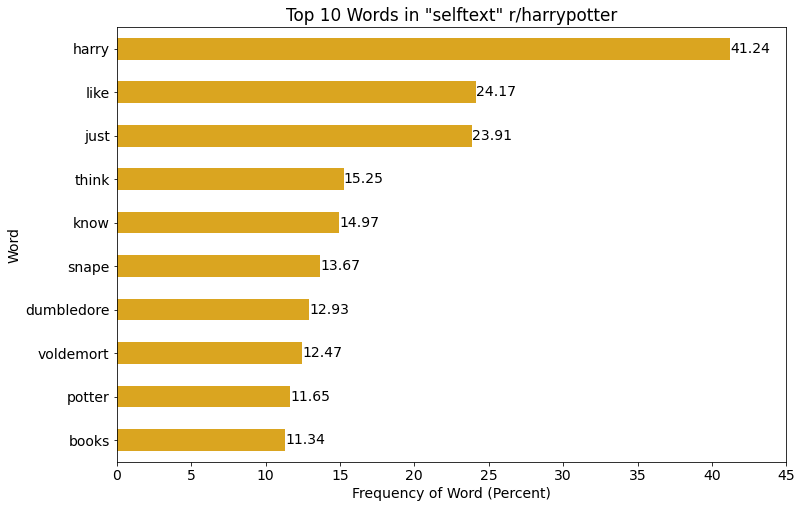

In [600]:
ax = hp_common_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "selftext" r/harrypotter',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='goldenrod',
    xlim=(0, 45)
)
ax.set_xlabel('Frequency of Word (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/hp_selftext_words');

##### The above are the common words in the 'selftext' of r/harrypotter. These are the words (or at least some of them) that I imagine will have an effect on the model's predictive capability.

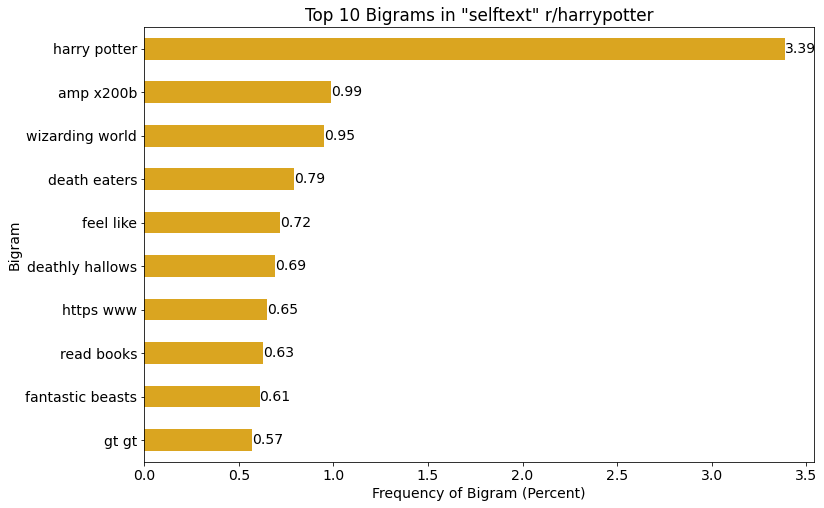

In [618]:
ax = hp_common_bigrams_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Bigrams in "selftext" r/harrypotter',
    ylabel='Frequency of Bigram (Percent)',
    xlabel='Bigram',
    color='goldenrod',
    xlim=(0, 3.54)
)
ax.set_xlabel('Frequency of Bigram (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/hp_selftext_bigrams');

##### The above are the most common bigrams in the 'selftext' of r/harrypotter. The frequencies here overall are lower than the words in the 'selftext'. This signals to me that bigrams aren't weighing too heavily on the influence of the posts, or at least not as much as the single words. We also see 'amp x200b' and 'gt gt' showing up as frequenct bigrams. These are not actual words, but rather special characters that are abundant in the code.

In [362]:
marvel_common_words = marvel_common.drop(columns=['subreddit']).sum().sort_values(ascending=True).tail(10)
marvel_common_words

amp        790
https      823
think      870
know       955
comics    1011
spider    1497
just      1619
like      1716
man       1793
marvel    1815
dtype: int64

In [363]:
marvel_common_bigrams_list = marvel_common_bigrams.drop(columns=['subreddit']).sum().sort_values()
marvel_common_bigrams_list

00 pm                0
mr tom               0
mr mrs               0
mr dursley           0
mr diggory           0
                  ... 
https redd         241
amazing spider     248
iron man           274
moon knight        325
spider man        1294
Length: 45697, dtype: int64

In [364]:
marvel_common_words_df = pd.DataFrame(marvel_common_words, columns=['word_count'])
marvel_common_words_df

,word_count
amp,790
https,823
think,870
know,955
comics,1011
spider,1497
just,1619
like,1716
man,1793
marvel,1815


In [365]:
marvel_common_bigrams_df = pd.DataFrame(marvel_common_bigrams_list, columns=['word_count'])
marvel_common_bigrams_df = marvel_common_bigrams_df[marvel_common_bigrams_df['word_count'] > 0].tail(10)
marvel_common_bigrams_df

,word_count
marvel comics,149
doctor strange,150
captain america,155
way home,170
https www,177
https redd,241
amazing spider,248
iron man,274
moon knight,325
spider man,1294


In [366]:
marvel_common_words_df['percent'] = ((marvel_common_words_df['word_count'] / 3491) * 100).round(2)
marvel_common_words_df

,word_count,percent
amp,790,22.63
https,823,23.57
think,870,24.92
know,955,27.36
comics,1011,28.96
spider,1497,42.88
just,1619,46.38
like,1716,49.15
man,1793,51.36
marvel,1815,51.99


In [367]:
marvel_common_bigrams_df['percent'] = ((marvel_common_bigrams_df['word_count'] / 19657) * 100).round(2)
marvel_common_bigrams_df

,word_count,percent
marvel comics,149,0.76
doctor strange,150,0.76
captain america,155,0.79
way home,170,0.86
https www,177,0.90
https redd,241,1.23
amazing spider,248,1.26
iron man,274,1.39
moon knight,325,1.65
spider man,1294,6.58


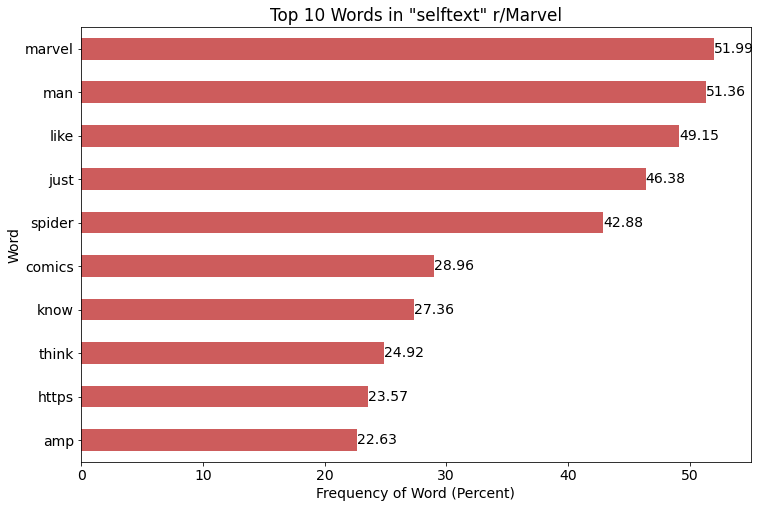

In [604]:
ax = marvel_common_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "selftext" r/Marvel',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='indianred',
    xlim=(0, 55)
)
ax.set_xlabel('Frequency of Word (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/marvel_selftext_words');

##### The above are the most common words in the 'selftext' of the r/Marvel subreddit. Again, I imagine these will have the most influence on the model's predictive capabilities.

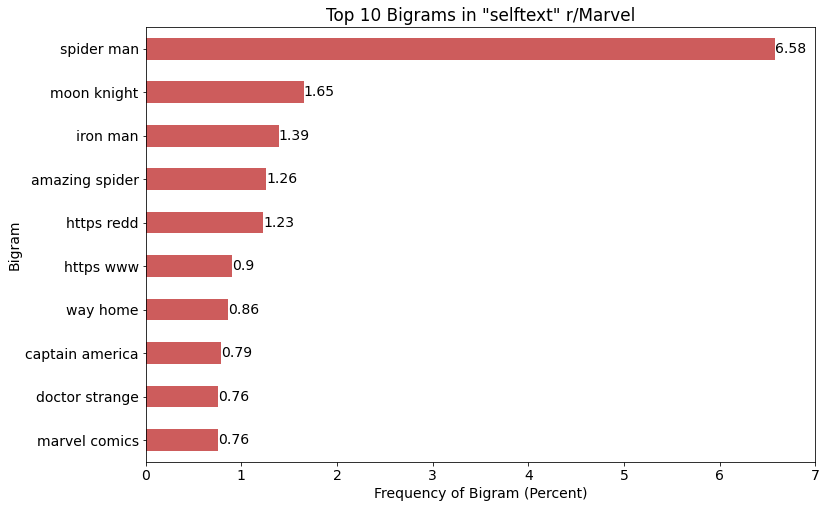

In [617]:
ax = marvel_common_bigrams_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Bigrams in "selftext" r/Marvel',
    ylabel='Frequency of Bigram (Percent)',
    xlabel='Bigram',
    color='indianred',
    xlim=(0, 7)
)
ax.set_xlabel('Frequency of Bigram (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/marvel_selftext_bigrams');

##### Above are the most common bigrams in the 'selftext' of r/Marvel. Just like in r/harrypotter, the overall frequencies of these words are lower than the single words. 

#### Getting the Most Common Words in 'title' Per Subreddit

In [370]:
cv3 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv3.fit(subreddit['title'])
vect_status = cv3.transform(subreddit['title'])
status_df_2 = pd.DataFrame(vect_status.A, columns=cv3.get_feature_names_out())

common_words_2 = status_df.sum().sort_values(ascending=False).head(15)
common_words_2

harry         5786
like          5086
just          4953
know          3042
think         2996
time          2155
man           2095
really        2027
people        1914
snape         1906
marvel        1826
dumbledore    1803
did           1748
voldemort     1738
amp           1726
dtype: int64

#### Getting common bigrams in 'title'

In [371]:
cv4 = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2, ngram_range=(2,2))
cv4.fit(subreddit['title'])
vect_status = cv4.transform(subreddit['title'])
bigram_df_2 = pd.DataFrame(vect_status.A, columns=cv4.get_feature_names_out())

common_bigrams_2 = bigram_df_2.sum().sort_values(ascending=False).head(15)
common_bigrams_2

harry potter          546
spider man            205
fantastic beasts      184
moon knight           125
way home               99
cursed child           95
secrets dumbledore     88
wizarding world        80
deathly hallows        68
unpopular opinion      60
hogwarts legacy        59
chamber secrets        54
iron man               49
need help              48
half blood             47
dtype: int64

In [372]:
status_df_2.drop(columns='subreddit', inplace=True)

In [373]:
title_common_words_subreddit = pd.concat([status_df_2, subreddit['subreddit']], axis=1)
title_common_words_subreddit

,00,000,01,10,100,1000,11,12,13,14,...,youre,youth,youtube,youve,yule,zarathos,zdarsky,zodiac,zombies,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter


In [374]:
title_common_bigrams_subreddit = pd.concat([bigram_df_2, subreddit['subreddit']], axis=1)
title_common_bigrams_subreddit

,00 pm,10 10,10 2022,10 eternals,10 powerful,10 worst,11 year,12 grimmauld,12 years,13 2022,...,young dudes,young snape,young tom,youtube series,youve heard,yule ball,zarathos spirit,zdarsky daredevil,zodiac sign,subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marvel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter
9598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,harrypotter


In [375]:
title_common_words_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

In [376]:
title_common_bigrams_subreddit['subreddit'].value_counts()

harrypotter    6109
Marvel         3491
Name: subreddit, dtype: int64

##### Filtering the words by subreddit

In [377]:
hp_common_title = title_common_words_subreddit[title_common_words_subreddit['subreddit']=='harrypotter']

In [378]:
hp_common_title_bigrams = title_common_bigrams_subreddit[title_common_bigrams_subreddit['subreddit']=='harrypotter']

In [379]:
marvel_common_title = title_common_words_subreddit[title_common_words_subreddit['subreddit']=='Marvel']

In [380]:
marvel_common_title_bigrams = title_common_bigrams_subreddit[title_common_bigrams_subreddit['subreddit']=='Marvel']

In [381]:
hp_common_title.drop(columns=['subreddit'], inplace=True)

In [382]:
hp_common_title_bigrams.drop(columns=['subreddit'], inplace=True)

In [383]:
hp_common_title_words = hp_common_title.sum().sort_values()
hp_common_title_words

lead             0
howard           0
hows             0
hugh             0
huh              0
              ... 
dumbledore     302
voldemort      308
hogwarts       312
potter         590
harry         1063
Length: 3934, dtype: int64

In [384]:
hp_common_title_bigrams = hp_common_title_bigrams.sum().sort_values()
hp_common_title_bigrams

really hasn             0
origin character        0
let carnage             0
lego marvel             0
read secret             0
                     ... 
wizarding world        79
secrets dumbledore     88
cursed child           95
fantastic beasts      184
harry potter          546
Length: 3163, dtype: int64

In [385]:
hp_common_title_words_df = pd.DataFrame(hp_common_title_words, columns=['word_count'])
hp_common_title_words_df = hp_common_title_words_df[hp_common_title_words_df['word_count'] > 0].tail(10)
hp_common_title_words_df

,word_count
snape,264
just,266
think,271
books,284
did,292
dumbledore,302
voldemort,308
hogwarts,312
potter,590
harry,1063


In [386]:
hp_common_title_bigrams_df = pd.DataFrame(hp_common_title_bigrams, columns=['word_count'])
hp_common_title_bigrams_df = hp_common_title_bigrams_df[hp_common_title_bigrams_df['word_count'] > 0].tail(10)
hp_common_title_bigrams_df

,word_count
half blood,47
unpopular opinion,51
chamber secrets,54
hogwarts legacy,59
deathly hallows,68
wizarding world,79
secrets dumbledore,88
cursed child,95
fantastic beasts,184
harry potter,546


##### Adding a Percent column to better compare the r/Marvel and r/harrypotter words

In [387]:
hp_common_title_words_df['percent'] = ((hp_common_title_words_df['word_count'] / 3378) * 100).round(2)
hp_common_title_words_df

,word_count,percent
snape,264,7.82
just,266,7.87
think,271,8.02
books,284,8.41
did,292,8.64
dumbledore,302,8.94
voldemort,308,9.12
hogwarts,312,9.24
potter,590,17.47
harry,1063,31.47


In [388]:
hp_common_title_bigrams_df['percent'] = ((hp_common_title_bigrams_df['word_count'] / 2209) * 100).round(2)
hp_common_title_bigrams_df

,word_count,percent
half blood,47,2.13
unpopular opinion,51,2.31
chamber secrets,54,2.44
hogwarts legacy,59,2.67
deathly hallows,68,3.08
wizarding world,79,3.58
secrets dumbledore,88,3.98
cursed child,95,4.30
fantastic beasts,184,8.33
harry potter,546,24.72


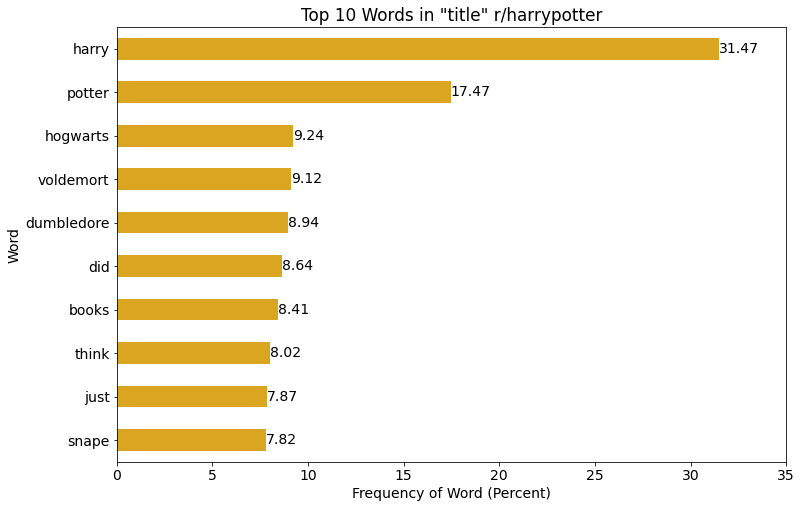

In [607]:
ax = hp_common_title_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "title" r/harrypotter',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='goldenrod',
    xlim=(0, 35)
)
ax.set_xlabel('Frequency of Word (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/hp_title_words');

##### The above are the most common words in the 'title' in r/harrypotter. The frequencies here are lower than in 'selftext', but they're bound to have an influence on the model.

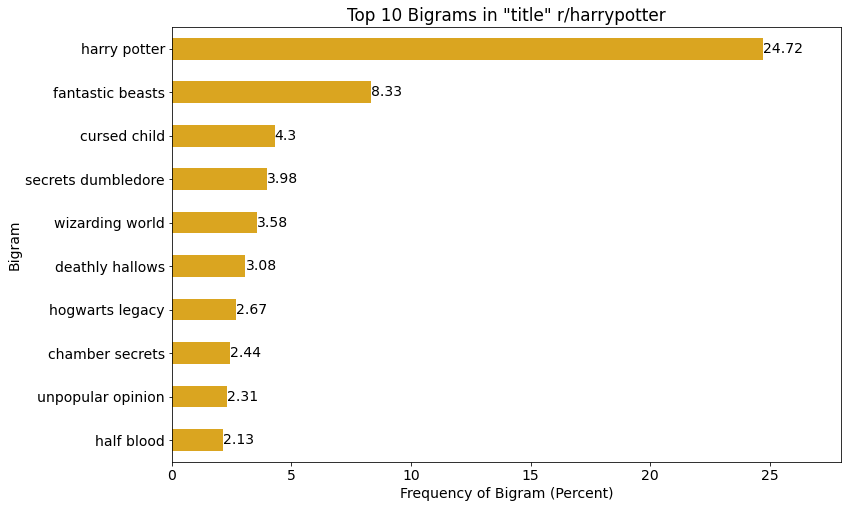

In [610]:
ax = hp_common_title_bigrams_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Bigrams in "title" r/harrypotter',
    ylabel='Frequency of Bigram (Percent)',
    xlabel='Bigram',
    color='goldenrod',
    xlim=(0, 28)
)
ax.set_xlabel('Frequency of Bigram (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/hp_title_bigrams');

##### Above are the most common bigrams in the 'title' in r/harrypotter. Overall the frequencies may be lower, but that top bigram of 'harry potter' has a very large frequency percentage. This tells me that it will likely have an impact on the model.

In [391]:
marvel_common_title_words = marvel_common_title.drop(columns=['subreddit']).sum().sort_values()
marvel_common_title_words

00               0
governments      0
scabbers         0
scamander        0
scar             0
              ... 
spider         231
mcu            233
comics         266
man            281
marvel         587
Length: 3934, dtype: int64

In [392]:
marvel_common_title_bigrams = marvel_common_title_bigrams.drop(columns=['subreddit']).sum().sort_values()
marvel_common_title_bigrams

00 pm                 0
oliver wood           0
older sympathize      0
old harry             0
okay question         0
                   ... 
doctor strange       44
iron man             49
way home             99
moon knight         125
spider man          205
Length: 3163, dtype: int64

In [393]:
marvel_common_title_words_df = pd.DataFrame(marvel_common_title_words, columns=['word_count'])
marvel_common_title_words_df = marvel_common_title_words_df[marvel_common_title_words_df['word_count'] > 0].tail(10)
marvel_common_title_words_df

,word_count
way,126
moon,132
knight,134
question,161
comic,162
spider,231
mcu,233
comics,266
man,281
marvel,587


In [394]:
marvel_common_title_bigrams_df = pd.DataFrame(marvel_common_title_bigrams, columns=['word_count'])
marvel_common_title_bigrams_df = marvel_common_title_bigrams_df[marvel_common_title_bigrams_df['word_count'] > 0].tail(10)
marvel_common_title_bigrams_df

,word_count
reading order,28
dr strange,34
marvel comics,40
multiverse madness,41
captain america,43
doctor strange,44
iron man,49
way home,99
moon knight,125
spider man,205


In [395]:
marvel_common_title_words_df['percent'] = ((marvel_common_title_words_df['word_count'] / 2536) * 100).round(2)
marvel_common_title_words_df

,word_count,percent
way,126,4.97
moon,132,5.21
knight,134,5.28
question,161,6.35
comic,162,6.39
spider,231,9.11
mcu,233,9.19
comics,266,10.49
man,281,11.08
marvel,587,23.15


In [396]:
marvel_common_title_bigrams_df['percent'] = ((marvel_common_title_bigrams_df['word_count'] / 1438) * 100).round(2)
marvel_common_title_bigrams_df

,word_count,percent
reading order,28,1.95
dr strange,34,2.36
marvel comics,40,2.78
multiverse madness,41,2.85
captain america,43,2.99
doctor strange,44,3.06
iron man,49,3.41
way home,99,6.88
moon knight,125,8.69
spider man,205,14.26


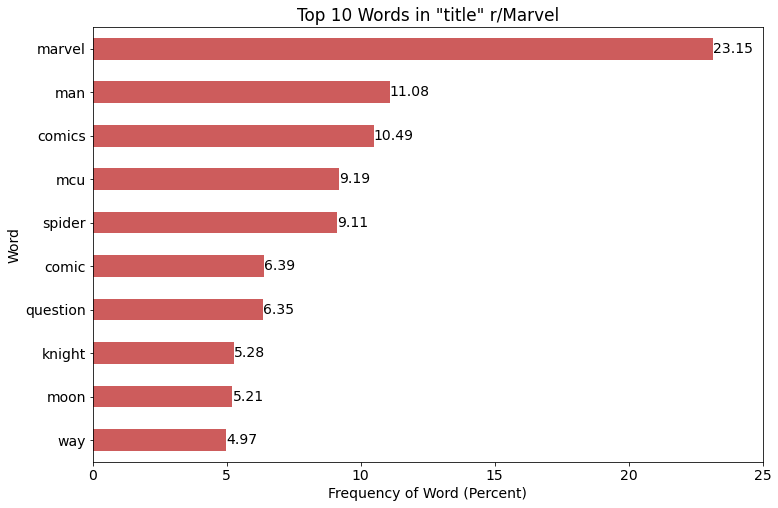

In [611]:
ax = marvel_common_title_words_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Words in "title" r/Marvel',
    ylabel='Frequency of Word (Percent)',
    xlabel='Word',
    color='indianred',
    xlim=(0, 25)
)
ax.set_xlabel('Frequency of Word (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/marvel_title_words');

##### Above are the most common words in the 'title' of r/Marvel. The word 'marvel' is still the reigning champion of common words, so it's likely to heavily influence the model.

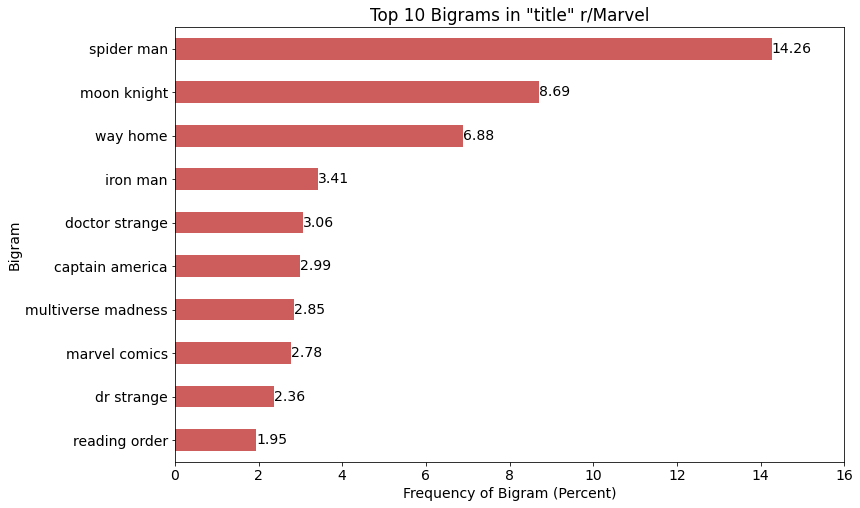

In [616]:
ax = marvel_common_title_bigrams_df['percent'].plot.barh(
    figsize=(12,8),
    title='Top 10 Bigrams in "title" r/Marvel',
    ylabel='Frequency of Bigram (Percent)',
    xlabel='Bigram',
    color='indianred',
    xlim=(0, 16)
)
ax.set_xlabel('Frequency of Bigram (Percent)'),
ax.bar_label(ax.containers[0]),
plt.rc({'font.size': 14}),
plt.savefig('../images/marvel_title_bigrams');

##### Above are the most common bigrams in the 'title' of r/Marvel. Here we can see again, lower frequencies overall, but that people seem to really love Spider-man.